# Project Diary


# Investigating the Fish Landings and the Fishing Vessels data

In this notebook, various techniques are used to explore the data stored for the fishing vessels and fish Landings data that was stored in MongoDB.

The notebook will utilise pandas and other tools to create graphs and map plot. It will use a MongoDB connection to store the imported data.  So the settings from the setup notebook is loaded in first. 

The setup notebook was done separately to reduced the amount of code written in each note book. It can be amended individually. So all the setup done in one file means there is no need to write the same code in 2+ notebooks.

In [ ]:
# import modules needed and database connection from setup file
%run 02_setup.py

## First glance at the FishLandings Data

To get a feel for the dataset, the FishLandings data was examined to determine how it can relate to the Fishing Vessels dataset.

In [79]:
# get the names of the files in the directory
os.listdir("Analysis_data/FishLandings")

['fleet_landings_into_the_UK_by_port_2016.csv',
 'fleet_landings_into_the_UK_by_port_2017.csv',
 'fleet_landings_into_the_UK_by_port_2018.csv',
 'fleet_landings_into_the_UK_by_port_2019.csv']

In [80]:
# get a path to a file
path = 'Analysis_data/FishLandings/'

It is assumed that all files use the same encoding as they were documented the same way. So only encoding for just one file is checked and this encoding will be used to reference the other csv files. This is done because the chardet.dectect() function is very slow when checking just a single file. Having it checked all will consume time.

In [81]:
# get the encoding from one of the files in the fishlanding directory (approx 2-3min run)
file_encode = chardet.detect(open(path + 'fleet_landings_into_the_UK_by_port_2016.csv','rb').read())

In [82]:
# preview first and last 3 entries of 2016 data
df_landings_2016 = pd.read_csv(path + 'fleet_landings_into_the_UK_by_port_2016.csv', encoding=file_encode.get("encoding"))
df_landings_2016.head(3).append(df_landings_2016.tail(3))

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.1828,0.1828,201.08
1,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.0141,0.0141,238.10
2,2016,1,Aberdeen,UK - Scotland,UK - Scotland,10m&Under,Demersal trawl/seine,NEP,Nephrops (Norway Lobster),Nephrops,Shellfish,0.3560,0.3560,1437.10
83186,2016,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0120,0.0120,14.04
83187,2016,12,Wyke Regis,UK - England,UK - England,10m&Under,Drift and fixed nets,BSS,Bass,Bass,Demersal,0.0068,0.0068,58.34
83188,2016,12,Wyke Regis,UK - England,UK - England,10m&Under,Drift and fixed nets,MUL,Mullet - Other,Other Demersal,Demersal,0.0130,0.0130,66.30


In [83]:
# show unique species group
df_landings_2016["Species Group"].unique()

array(['Shellfish', 'Demersal', 'Pelagic'], dtype=object)

The initial glance of the fishing landings dataset for 2016 shows there are 83189 entries. There are 3 species group, Shellfish Demersal and Pelagic which can be used as an point for investigations. Port of Landing could be the point used to compare this dataset with the fishing vessels.

## Store the data in a MongoDB database

#### Importing the Fishing Vessels files

In [84]:
# import already cleaned fishing vessels data (approx 10-40s)
%run 03_fishingvessels.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Administrative port                     6270 non-null   object 
 1   Home port                               6270 non-null   object 
 2   Port letters and numbers                6270 non-null   object 
 3   Vessel name                             6270 non-null   object 
 4   Registry of Shipping and Seamen number  6270 non-null   object 
 5   Licence number                          6270 non-null   int64  
 6   Fish producer organisation              6270 non-null   object 
 7   Overall length                          6270 non-null   float64
 8   Registered tonnage                      6270 non-null   float64
 9   Engine power                            6270 non-null   float64
 10  Vessel capacity units                   6270 non-null   floa

#### Importing the FishingLandings files

Before the files are combined, they must be analysed to verify the structure and check if they have different columns.

In [85]:
# check the structure of 2017 data
df_landings_2017 = pd.read_csv(path+'fleet_landings_into_the_UK_by_port_2017.csv', encoding=file_encode.get("encoding"))
df_landings_2017.head(3).append(df_landings_2017.tail(3))

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,2017,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Drift and fixed nets,BSS,Bass,Bass,Demersal,0.0079,0.0079,87.56
1,2017,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Drift and fixed nets,MUL,Mullet - Other,Other Demersal,Demersal,0.0152,0.0152,44.14
2,2017,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Drift and fixed nets,POL,Pollack,Pollack (Lythe),Demersal,0.0008,0.0008,2.46
78124,2017,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0010,0.0010,1.17
78125,2017,12,Worthing,UK - England,UK - England,10m&Under,Gears using hooks,BIB,Pouting (Bib),Other Demersal,Demersal,0.0550,0.0550,13.75
78126,2017,12,Worthing,UK - England,UK - England,10m&Under,Gears using hooks,POL,Pollack,Pollack (Lythe),Demersal,0.0040,0.0040,8.00


In [86]:
# check the structure of 2018 data
df_landings_2018 = pd.read_csv(path+'fleet_landings_into_the_UK_by_port_2018.csv', encoding=file_encode.get("encoding"))
df_landings_2018.head(3).append(df_landings_2018.tail(3))

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,2018,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.1177,0.1177,211.86
1,2018,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.0074,0.0074,152.70
2,2018,1,Aberdeen,UK - Scotland,UK - Scotland,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,2.2480,2.2480,5102.96
75713,2018,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,PLE,Plaice,Plaice,Demersal,0.0020,0.0020,4.12
75714,2018,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,SYC,Lesser Spotted Dog,Dogfish,Demersal,0.0645,0.0645,61.30
75715,2018,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0842,0.0752,201.45


In [87]:
# check the structure of 2019 data
df_landings_2019 =pd.read_csv(path+'fleet_landings_into_the_UK_by_port_2019.csv', encoding=file_encode.get("encoding"))
df_landings_2019.head(3).append(df_landings_2019.tail(3))

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,2019,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.0422,0.0422,102.04
1,2019,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.1200,0.1200,2177.60
2,2019,1,Aberdeen,UK - Scotland,UK - Scotland,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,11.0940,11.0940,31906.45
79675,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,RJU,Undulate Ray,Skates and Rays,Demersal,0.0050,0.0050,10.35
79676,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,SYC,Lesser Spotted Dog,Dogfish,Demersal,0.0300,0.0300,14.40
79677,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0276,0.0240,24.96


From eyeballing, all files seem to produce the same structure, i.e. column names. However, to verify, they are checked against each other.

In [88]:
# compare 2017 to 2016
df_landings_2017.columns.difference(df_landings_2016.columns)

Index([], dtype='object')

In [89]:
# compare 2018 to 2017
df_landings_2018.columns.difference(df_landings_2017.columns)

Index([], dtype='object')

In [90]:
# compare 2019 to 2018
df_landings_2019.columns.difference(df_landings_2018.columns)

Index([], dtype='object')

All results verify that the files are in the same structure.

The check is completed so the dataframes can be removed to clear memory 

In [91]:
# delete 2016 - 2019 dfs as they are no longer needed
del df_landings_2016, df_landings_2017, df_landings_2018, df_landings_2019

The files can then be added to the same dataframe, directly from the directory.

In [92]:
# initialise an empty df to input all entries
landings_df = pd.DataFrame()

# iterate over all files and add each to the dataframe
for i in glob.glob(os.path.join(path,"*.csv")):
    temp_df = pd.read_csv(i, encoding=file_encode.get("encoding"))
    landings_df = landings_df.append(temp_df, ignore_index=1)

# preview the first and last 3 entries
landings_df.head(3).append(landings_df.tail(3))

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.1828,0.1828,201.08
1,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.0141,0.0141,238.10
2,2016,1,Aberdeen,UK - Scotland,UK - Scotland,10m&Under,Demersal trawl/seine,NEP,Nephrops (Norway Lobster),Nephrops,Shellfish,0.3560,0.3560,1437.10
316707,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,RJU,Undulate Ray,Skates and Rays,Demersal,0.0050,0.0050,10.35
316708,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,SYC,Lesser Spotted Dog,Dogfish,Demersal,0.0300,0.0300,14.40
316709,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0276,0.0240,24.96


In [93]:
len(landings_df)

316710

In total, the 4 files of Fishing Landings data  produced 316,710 entries when combined. 

#### Cleaning the FishingLandings data

In [94]:
landings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316710 entries, 0 to 316709
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             316710 non-null  int64  
 1   Month                            316710 non-null  int64  
 2   Port of Landing                  316710 non-null  object 
 3   Port Nationality                 316710 non-null  object 
 4   Vessel Nationality               316710 non-null  object 
 5   Length Group                     316710 non-null  object 
 6   Gear Category                    316710 non-null  object 
 7   Species Code                     316710 non-null  object 
 8   Species Name                     316710 non-null  object 
 9   Species as shown in publication  316710 non-null  object 
 10  Species Group                    316709 non-null  object 
 11  Live Weight (tonnes)             316710 non-null  float64
 12  La

The object types seem to match their respective element so no adjustments are needed.

In [95]:
# check types of values in species group
landings_df["Species Group"].value_counts(dropna=False)

Demersal     198518
Shellfish    106688
Pelagic       11503
NaN               1
Name: Species Group, dtype: int64

In [96]:
# check for null values
landings_df.isna().sum()

Year                               0
Month                              0
Port of Landing                    0
Port Nationality                   0
Vessel Nationality                 0
Length Group                       0
Gear Category                      0
Species Code                       0
Species Name                       0
Species as shown in publication    0
Species Group                      1
Live Weight (tonnes)               0
Landed Weight (tonnes)             0
Value(£)                           0
dtype: int64

In [97]:
# check which item is null
landings_df[pd.isnull(landings_df["Species Group"])]

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
163146,2018,1,Howth,Ireland,UK - Northern Ireland,Over10m,Demersal trawl/seine,MAS,Chub Mackerel,Other,NaN,0.0108,0.0099,0.0


In [98]:
# compare with similar species
landings_df[landings_df["Species Name"]=="Chub Mackerel"]

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
118528,2017,6,Lyme Regis,UK - England,UK - England,10m&Under,Drift and fixed nets,MAS,Chub Mackerel,Other Pelagic,Pelagic,0.0023,0.0023,5.84
151248,2017,11,Helford River,UK - England,UK - England,10m&Under,Drift and fixed nets,MAS,Chub Mackerel,Other Pelagic,Pelagic,0.0680,0.0680,103.77
163146,2018,1,Howth,Ireland,UK - Northern Ireland,Over10m,Demersal trawl/seine,MAS,Chub Mackerel,Other,NaN,0.0108,0.0099,0.00


In [99]:
# replace values to match species
landings_df.loc[landings_df["Species Name"]=="Chub Mackerel","Species Group"]="Pelagic"

In [100]:
# recheck that species 
landings_df[landings_df["Species Name"]=="Chub Mackerel"]

,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
118528,2017,6,Lyme Regis,UK - England,UK - England,10m&Under,Drift and fixed nets,MAS,Chub Mackerel,Other Pelagic,Pelagic,0.0023,0.0023,5.84
151248,2017,11,Helford River,UK - England,UK - England,10m&Under,Drift and fixed nets,MAS,Chub Mackerel,Other Pelagic,Pelagic,0.0680,0.0680,103.77
163146,2018,1,Howth,Ireland,UK - Northern Ireland,Over10m,Demersal trawl/seine,MAS,Chub Mackerel,Other,Pelagic,0.0108,0.0099,0.00


In [101]:
# recheck types of values in species group
landings_df["Species Group"].value_counts(dropna=False)

Demersal     198518
Shellfish    106688
Pelagic       11504
Name: Species Group, dtype: int64

In [102]:
# recheck for null values
landings_df.isna().sum()

Year                               0
Month                              0
Port of Landing                    0
Port Nationality                   0
Vessel Nationality                 0
Length Group                       0
Gear Category                      0
Species Code                       0
Species Name                       0
Species as shown in publication    0
Species Group                      0
Live Weight (tonnes)               0
Landed Weight (tonnes)             0
Value(£)                           0
dtype: int64

Since NaN values are not allowed MongoDB, these items are OK to be inserted as the results return that there are no columns with NaN values.

#### Inserting the data to mongoDB

In [103]:
# create a uk fishing landing collection
ves_land_db.drop_collection('fishing_landings')
fl_collection = ves_land_db['fishing_landings']

In [104]:
# insert landings_df into fishing landings collection - fl_collection
fl_collection.insert_many(landings_df.to_dict(orient='records'))

In [105]:
# preview first 3 documents where landings_df was inserted
pd.DataFrame(fl_collection.find({})).head(3)

,_id,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
0,629f1245423a90bd4ab69189,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.1828,0.1828,201.08
1,629f1245423a90bd4ab6918a,2016,1,Aberdaran,UK - Wales,UK - Wales,10m&Under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.0141,0.0141,238.10
2,629f1245423a90bd4ab6918b,2016,1,Aberdeen,UK - Scotland,UK - Scotland,10m&Under,Demersal trawl/seine,NEP,Nephrops (Norway Lobster),Nephrops,Shellfish,0.3560,0.3560,1437.10


In [106]:
# preview first 3 documents where landings_df was inserted
pd.DataFrame(fl_collection.find({})).tail(3)

,_id,Year,Month,Port of Landing,Port Nationality,Vessel Nationality,Length Group,Gear Category,Species Code,Species Name,Species as shown in publication,Species Group,Live Weight (tonnes),Landed Weight (tonnes),Value(£)
316707,629f124a423a90bd4abb66ac,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,RJU,Undulate Ray,Skates and Rays,Demersal,0.0050,0.005,10.35
316708,629f124a423a90bd4abb66ad,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,SYC,Lesser Spotted Dog,Dogfish,Demersal,0.0300,0.030,14.40
316709,629f124a423a90bd4abb66ae,2019,12,Worthing,UK - England,UK - England,10m&Under,Drift and fixed nets,WHG,Whiting,Whiting,Demersal,0.0276,0.024,24.96


In [107]:
# check if all items where inserted
print(len(landings_df))
print(fl_collection.count_documents({}))

316710
316710


Since the results returned the same number of entries, it means there is no difference in the landing_df rows and the entries imported to MongoDB.

Although previous checks showed there were no NaN values in the entries prior to being added to the database, as an extra step, the keys in the collection are rechecked and replaced with "". This maintains the integrity that no NaN values are allowed in MongoDB.

In [108]:
# check for NaN values and replace it
for key in fl_collection.find_one({}).keys():
    fl_collection.update_many({key: float('nan')}, {'$unset': {key:''}})

## Investigation 1 : Fishing Landings throughout the year.

#### This investigation aims to answer: *Does the month impact the species caught throughout the year?*


This investigation will look at the trend of Shellfish, Demersal and Pelagic species landed over the year. It aims to find out if the month relates to the total tonnes weight in landings for each species. The result would return a graph showing monthly increases or decreases.

In [109]:
# Set a larger plot size than the default
sns.set(rc={'figure.figsize':(11,8)})

This investigation would require, the months, species group data from the dataset from the fishing landing collection. It would alos need the total weigh of landings. 

To recall what the columns are stored as in the database, an example from the fl.collection was first called.

In [110]:
fl_collection.find_one({}).keys()

dict_keys(['_id', 'Year', 'Month', 'Port of Landing', 'Port Nationality', 'Vessel Nationality', 'Length Group', 'Gear Category', 'Species Code', 'Species Name', 'Species as shown in publication', 'Species Group', 'Live Weight (tonnes)', 'Landed Weight (tonnes)', 'Value(£)'])

From the result, the columns needed are, 'Month', 'Species Group' and 'Landed Weight (tonnes)'. These  are then pulled from the MongoDB collection.

In [111]:
pipeline1 = [{'$match': {'Species Group': {'$exists': True}}},
            {'$group': {'_id': {
                'Month': '$Month',
                'Year':'$Year',
                'Species Group': '$Species Group'},
                'Landed Weight (tonnes)': {'$sum': '$Landed Weight (tonnes)'}}},

            {'$project': {'Year': '$_id.Year','Month': '$_id.Month', 'Species Group': '$_id.Species Group',
                          'Landed Weight (tonnes)':'$Landed Weight (tonnes)', '_id': 0}},
            {'$sort': {'Month': 1}}
            ]

spec_group_df = pd.json_normalize(fl_collection.aggregate(pipeline1))
spec_group_df.pivot(index=['Year','Species Group'], columns='Month', values='Landed Weight (tonnes)').reset_index()

Month,Year,Species Group,1,2,3,4,5,6,7,8,9,10,11,12
0,2016,Demersal,12951.5491,13466.8122,15197.2572,15461.5088,15234.4048,16553.6290,15388.5164,15423.8110,14734.3545,14402.5208,15217.5177,14320.3193
1,2016,Pelagic,68480.4095,53956.7591,28408.5184,16829.7107,275.8518,3220.9279,18961.6883,48298.0898,25839.7478,46970.1879,65932.9041,11769.3995
2,2016,Shellfish,6863.5819,9348.8962,10489.0794,9508.6545,11510.1503,12107.3229,16469.2958,14774.5151,12047.3197,14897.4576,13366.3248,9082.1949
3,2017,Demersal,13813.0697,13859.0481,14285.0450,14369.6844,21195.3537,18856.4356,14336.9684,14833.5685,14279.1161,12696.8079,14551.3785,12499.6984
4,2017,Pelagic,105834.0294,17133.8437,38714.3967,35125.9997,1155.6965,2300.4062,16585.1461,34901.5606,27771.4955,62976.7033,58793.5628,8741.2439
5,2017,Shellfish,8273.5865,7440.1095,10865.9100,11009.0335,10985.2337,11274.7312,14543.7227,14589.8206,13392.4419,12905.0369,12037.7071,7901.2876
6,2018,Demersal,14545.2668,12916.3901,15245.6655,15213.7615,19920.2517,15586.4526,14461.5535,15185.3946,13361.0150,14599.0883,15654.7028,10867.7572
7,2018,Pelagic,71879.1422,35063.3560,53233.5741,12232.9407,478.8777,6263.9358,20824.5353,38035.0955,31492.2250,60474.7901,67551.2203,7134.9505
8,2018,Shellfish,6556.0072,7112.4672,8800.8888,8139.0592,9396.0200,10902.5610,14550.4527,15672.4812,12323.6998,11275.9582,10604.6771,7995.2341
9,2019,Demersal,13831.3006,13082.1365,12515.8972,15198.7686,16199.7003,14459.7820,14018.7865,14344.0854,12967.5247,13578.7034,13588.5617,9707.7600


In [112]:
# create a function to plot landings
def plot_landings(df):

    colourMap_dict = {'Demersal':'darkblue',
                    'Pelagic':'purple',
                    'Shellfish':'seagreen'}

    # loop through the different species:
    for species in set(df['Species Group']):
        plt.scatter(df['Month'][df['Species Group']==species],
                    df['Landed Weight (tonnes)'][df['Species Group']==species],
                    color=colourMap_dict[species], label='Species Group: ' + species
                )

    
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Landed Weight (tonnes)')



In [113]:
# create function to pull annual data from monogdb
def yearly_landings(year):

    pipeline = [{'$match': {'Year': year}},
                {'$group': {'_id': {
                    'Year':'$Year',
                    'Month': '$Month',
                    'Species Group': '$Species Group'},
                    'total': {'$sum': '$Landed Weight (tonnes)'}}},

                {'$project': {'Year':'$_id.Year',
                            'Month': '$_id.Month',
                            'Species Group': '$_id.Species Group',
                            'Landed Weight (tonnes)': '$total', '_id': 0}},

                {'$sort': {'Month': 1}}]

    df = pd.json_normalize(fl_collection.aggregate(pipeline))
    display(df.pivot(index=['Year','Month'], columns='Species Group', values='Landed Weight (tonnes)').reset_index())
    plot_landings(df)


Species Group,Year,Month,Demersal,Pelagic,Shellfish
0,2016,1,12951.5491,68480.4095,6863.5819
1,2016,2,13466.8122,53956.7591,9348.8962
2,2016,3,15197.2572,28408.5184,10489.0794
3,2016,4,15461.5088,16829.7107,9508.6545
4,2016,5,15234.4048,275.8518,11510.1503
5,2016,6,16553.6290,3220.9279,12107.3229
6,2016,7,15388.5164,18961.6883,16469.2958
7,2016,8,15423.8110,48298.0898,14774.5151
8,2016,9,14734.3545,25839.7478,12047.3197
9,2016,10,14402.5208,46970.1879,14897.4576


Text(0.5, 1.0, 'Scatter plot of Species Group dataset for 2016')

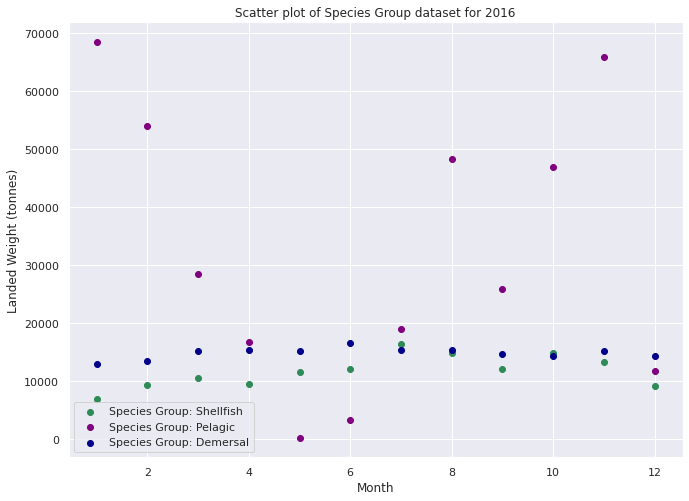

In [114]:
# plot yearly landing 2016
yearly_landings(2016)
plt.title('Scatter plot of Species Group dataset for 2016')

Species Group,Year,Month,Demersal,Pelagic,Shellfish
0,2017,1,13813.0697,105834.0294,8273.5865
1,2017,2,13859.0481,17133.8437,7440.1095
2,2017,3,14285.0450,38714.3967,10865.9100
3,2017,4,14369.6844,35125.9997,11009.0335
4,2017,5,21195.3537,1155.6965,10985.2337
5,2017,6,18856.4356,2300.4062,11274.7312
6,2017,7,14336.9684,16585.1461,14543.7227
7,2017,8,14833.5685,34901.5606,14589.8206
8,2017,9,14279.1161,27771.4955,13392.4419
9,2017,10,12696.8079,62976.7033,12905.0369


Text(0.5, 1.0, 'Scatter plot of Species Group dataset for 2017')

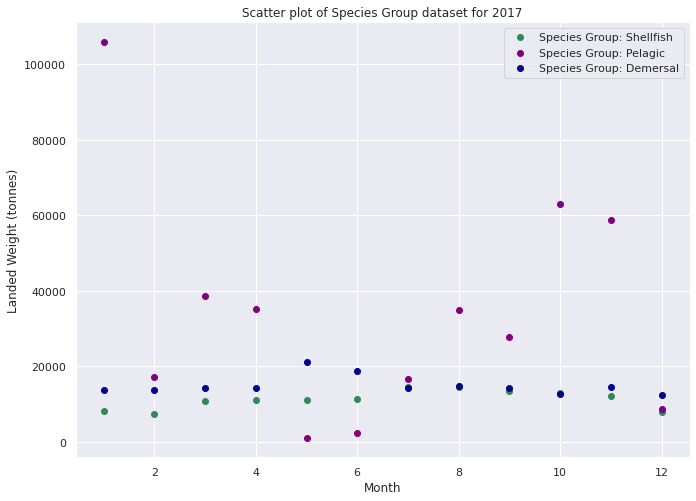

In [115]:
# plot yearly landing 2017
yearly_landings(2017)
plt.title('Scatter plot of Species Group dataset for 2017')

Species Group,Year,Month,Demersal,Pelagic,Shellfish
0,2018,1,14545.2668,71879.1422,6556.0072
1,2018,2,12916.3901,35063.3560,7112.4672
2,2018,3,15245.6655,53233.5741,8800.8888
3,2018,4,15213.7615,12232.9407,8139.0592
4,2018,5,19920.2517,478.8777,9396.0200
5,2018,6,15586.4526,6263.9358,10902.5610
6,2018,7,14461.5535,20824.5353,14550.4527
7,2018,8,15185.3946,38035.0955,15672.4812
8,2018,9,13361.0150,31492.2250,12323.6998
9,2018,10,14599.0883,60474.7901,11275.9582


Text(0.5, 1.0, 'Scatter plot of Species Group dataset for 2018')

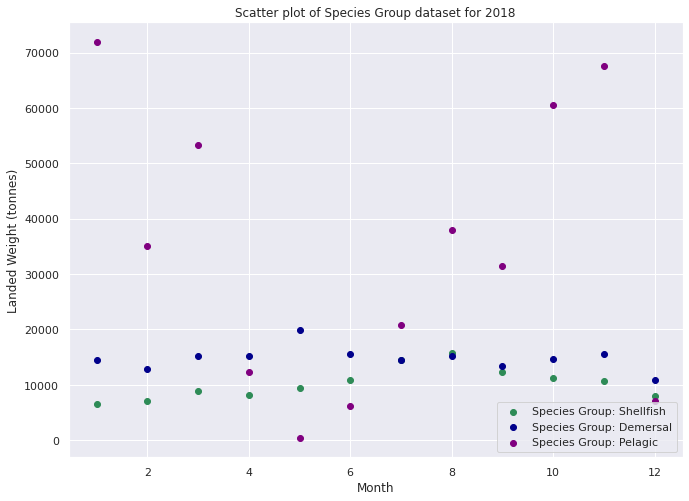

In [116]:
# plot yearly landing 2017
yearly_landings(2018)
plt.title('Scatter plot of Species Group dataset for 2018')

Species Group,Year,Month,Demersal,Pelagic,Shellfish
0,2019,1,13831.3006,58153.0580,9456.6652
1,2019,2,13082.1365,19839.9874,8244.0332
2,2019,3,12515.8972,52407.8713,9082.1942
3,2019,4,15198.7686,15435.6955,8970.0378
4,2019,5,16199.7003,817.9572,10855.7440
5,2019,6,14459.7820,2667.7468,11390.5083
6,2019,7,14018.7865,6689.8822,14986.6545
7,2019,8,14344.0854,23804.6301,14346.9178
8,2019,9,12967.5247,40173.6333,13597.4286
9,2019,10,13578.7034,57464.6747,12515.4485


Text(0.5, 1.0, 'Scatter plot of Species Group dataset for 2019')

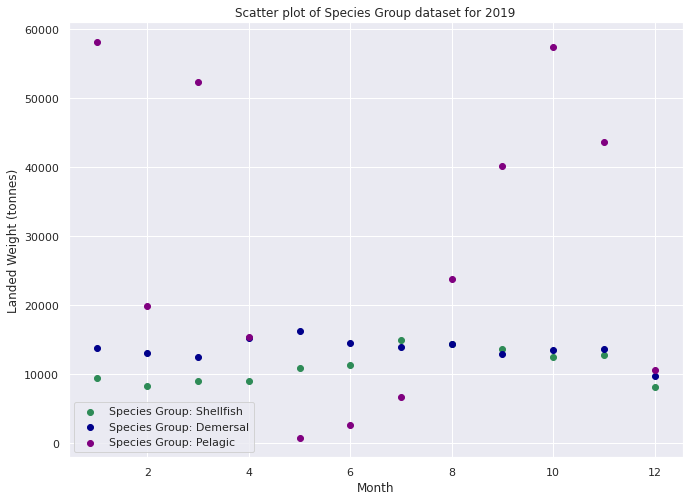

In [117]:
# plot yearly landing 2019
yearly_landings(2019)
plt.title('Scatter plot of Species Group dataset for 2019')

In [118]:
# get sum species group landed weight by month for all years
pipeline2 = [{'$match': {'Species Group': {'$exists': True}}},
            {'$group': {'_id': {
                'Month': '$Month',
                'Species Group': '$Species Group'},
                'total': {'$sum': '$Landed Weight (tonnes)'}}},

            {'$project': {'Species Group': '$_id.Species Group',
                          'Month': '$_id.Month',
                          'Landed Weight (tonnes)': '$total', '_id': 0}},

            {'$sort': {'Month': 1}}]

# add to dataframe
spec_group_df = pd.json_normalize(fl_collection.aggregate(pipeline2))
# show species group in columns
spec_group_df.pivot(index=['Month'], columns='Species Group', values='Landed Weight (tonnes)').reset_index()

Species Group,Month,Demersal,Pelagic,Shellfish
0,1,55141.1862,304346.6391,31149.8408
1,2,53324.3869,125993.9462,32145.5061
2,3,57243.8649,172764.3605,39238.0724
3,4,60243.7233,79624.3466,37626.7850
4,5,72549.7105,2728.3832,42747.1480
5,6,65456.2992,14453.0167,45675.1234
6,7,58205.8248,63061.2519,60550.1257
7,8,59786.8595,145039.3760,59383.7347
8,9,55342.0103,125277.1016,51360.8900
9,10,55277.1204,227886.3560,51593.9012


Text(0.5, 1.0, 'Scatter plot of Species Group dataset for 2016-19')

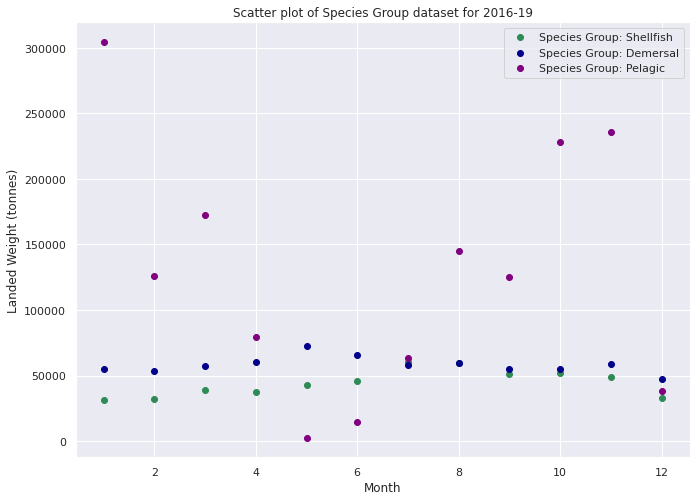

In [119]:
# plot yearly landing 2016-19
plot_landings(spec_group_df)
plt.title('Scatter plot of Species Group dataset for 2016-19')

## Investigation 2 : Relating landed species group and Fishing Vessels 

#### This investigation aims to answer: *Do administrative ports with similar vessels land similar species groups?*

In [120]:
uf_collection.find_one({}).keys()

dict_keys(['_id', 'Administrative port', 'Home port', 'Port letters and numbers', 'Vessel name', 'Registry of Shipping and Seamen number', 'Licence number', 'Fish producer organisation', 'Overall length', 'Registered tonnage', 'Engine power', 'Vessel capacity units', 'Year built', 'Hull', 'Country of construction', 'Shellfish  licence (Y/N)', 'Scallop licence (Y/N)', 'For Year', 'Licence Category'])

In [121]:
cols = {'Administrative port':1,'Overall length':1, 'Registered tonnage':1, 'Engine power':1, 'Vessel capacity units':1 ,'_id':0}
uf_df = pd.DataFrame(uf_collection.find({},cols))
uf_df


,Administrative port,Overall length,Registered tonnage,Engine power,Vessel capacity units
0,ABERDEEN,10.30,10.36,82.0,82.632
1,ABERDEEN,10.40,9.41,140.0,103.872
2,ABERDEEN,11.28,28.06,94.0,94.639
3,ABERDEEN,11.43,40.13,221.0,159.800
4,ABERDEEN,11.83,19.64,85.0,89.829
...,...,...,...,...,...
27339,ULLAPOOL,7.24,2.24,35.0,37.108
27340,ULLAPOOL,6.20,1.52,36.8,31.874
27341,ULLAPOOL,5.82,1.64,20.0,23.783
27342,ULLAPOOL,9.50,8.12,69.0,64.300


The uk fishing df contains duplicate values for the Administrative ports as the report combines all year entries. For this investigation the averages of theses year will be used to measure the vessels at each port.

In [122]:
pipeline = [{'$match': {'Administrative port': {'$exists': True}}},
            {'$group': {'_id': {
                'Administrative port': '$Administrative port'},
                'Avg Overall length': {'$avg': '$Overall length'},
                'Avg Registered tonnage': {'$avg': '$Registered tonnage'},
                'Avg Engine power': {'$avg': '$Engine power'},
                'Avg Vessel capacity units': {'$avg': '$Vessel capacity units'}    
                }},

            {'$project': {'Administrative port': '$_id.Administrative port',
                          'Avg Overall length': '$Avg Overall length',
                          'Avg Registered tonnage': '$Avg Registered tonnage',
                          'Avg Engine power': '$Avg Engine power',
                          'Avg Vessel capacity units': '$Avg Vessel capacity units'
                           }},

            {'$sort': {'Administrative port': 1}}
            ]
vessels_df = pd.json_normalize(uf_collection.aggregate(pipeline))
vessels_df.drop(['_id.Administrative port'], axis=1, inplace=True)
vessels_df.head()

,Administrative port,Avg Overall length,Avg Registered tonnage,Avg Engine power,Avg Vessel capacity units
0,ABERDEEN,7.684927,4.859660,75.826432,58.606260
1,AYR,13.106250,49.676359,180.553547,151.978914
2,BELFAST,12.831639,90.749383,253.608760,192.566022
3,BRIXHAM,9.881727,26.459529,121.182614,99.291188
4,BUCKIE,10.457269,37.688310,149.106481,116.538512


In [123]:
# get data from mongodb
pipeline = [{'$match': {'Administrative port': {'$exists': True}}},
            {'$group': {'_id': {
                'Administrative port': '$Administrative port'},
                'Avg Vessel length': {'$avg': '$Overall length'},   
                }},

            {'$project': {'Administrative port': '$_id.Administrative port',
                          'Avg Vessel length': '$Avg Vessel length',
                           }},

            {'$sort': {'Administrative port': 1}}
            ]
vessels_df = pd.json_normalize(uf_collection.aggregate(pipeline))
vessels_df.drop(['_id.Administrative port'], axis=1, inplace=True)
vessels_df.head()

,Administrative port,Avg Vessel length
0,ABERDEEN,7.684927
1,AYR,13.106250
2,BELFAST,12.831639
3,BRIXHAM,9.881727
4,BUCKIE,10.457269


Since there the revised fishing vessels didn't include location data, those are added here so it can be plotted onto a map to use later.

In [124]:
import geopy
geocoder = geopy.Nominatim(user_agent="ves_land-geocoding")

In [125]:
## define function to return latitude and longitude
def find_lat_long(port):
    location=geocoder.geocode(port +" , UK")
    return [location.latitude, location.longitude]

In [126]:
## return lat and long to dataframe
vessels_df[['Latitude', 'Longitude']] = pd.DataFrame(vessels_df['Administrative port'].apply(find_lat_long).tolist())
vessels_df.head()

,Administrative port,Avg Vessel length,Latitude,Longitude
0,ABERDEEN,7.684927,57.148243,-2.092809
1,AYR,13.106250,55.462804,-4.630250
2,BELFAST,12.831639,54.596391,-5.930183
3,BRIXHAM,9.881727,50.395240,-3.514544
4,BUCKIE,10.457269,57.676282,-2.964897


check key names

In [127]:
fl_collection.find_one({}).keys()

dict_keys(['_id', 'Year', 'Month', 'Port of Landing', 'Port Nationality', 'Vessel Nationality', 'Length Group', 'Gear Category', 'Species Code', 'Species Name', 'Species as shown in publication', 'Species Group', 'Live Weight (tonnes)', 'Landed Weight (tonnes)', 'Value(£)'])

In [128]:
# get landings admin and cluster from mongodb
pipeline = [{'$match': {'Species Group': {'$exists': True}}},
            {'$group': {'_id': {
                'Port of Landing': '$Port of Landing',
                'Species Group': '$Species Group'},
                'Landed Weight (tonnes)': {'$avg': '$Landed Weight (tonnes)'}}},
            ]

landings_cluster_df = pd.json_normalize(fl_collection.aggregate(pipeline))
landings_cluster_df.rename(columns={'_id.Port of Landing':'Administrative port', '_id.Species Group':'Cluster'}, inplace=True)
landings_cluster_df['Administrative port'] = landings_cluster_df['Administrative port'].str.upper()
landings_cluster_df

,Landed Weight (tonnes),Administrative port,Cluster
0,2.869322,BALLYCASTLE,Shellfish
1,6.032122,WESTRAY,Shellfish
2,0.091267,CLOVELLY,Shellfish
3,83.059000,HONNINGSVAG,Shellfish
4,0.151200,DUNDEE,Shellfish
...,...,...,...
1375,0.334562,AITH,Demersal
1376,0.076067,STACKPOLE QUAY,Demersal
1377,0.087222,CROMER,Pelagic
1378,0.282684,HARTLEPOOL,Demersal


Now that the two datasets are extracted from the db, they can be merged into one

In [129]:
# merge data
merged_df = vessels_df.merge(landings_cluster_df, on='Administrative port')
merged_df

,Administrative port,Avg Vessel length,Latitude,Longitude,Landed Weight (tonnes),Cluster
0,ABERDEEN,7.684927,57.148243,-2.092809,0.253824,Demersal
1,ABERDEEN,7.684927,57.148243,-2.092809,4.420427,Shellfish
2,ABERDEEN,7.684927,57.148243,-2.092809,0.804176,Pelagic
3,AYR,13.106250,55.462804,-4.630250,5.831873,Shellfish
4,BELFAST,12.831639,54.596391,-5.930183,1.503200,Shellfish
...,...,...,...,...,...,...
85,ULLAPOOL,8.924861,57.897824,-5.158665,0.890312,Pelagic
86,ULLAPOOL,8.924861,57.897824,-5.158665,15.595687,Demersal
87,WICK,5.950000,58.442552,-3.091583,0.687420,Pelagic
88,WICK,5.950000,58.442552,-3.091583,3.474237,Demersal


Text(0.5, 1.0, 'Scatter plot of first dataset')

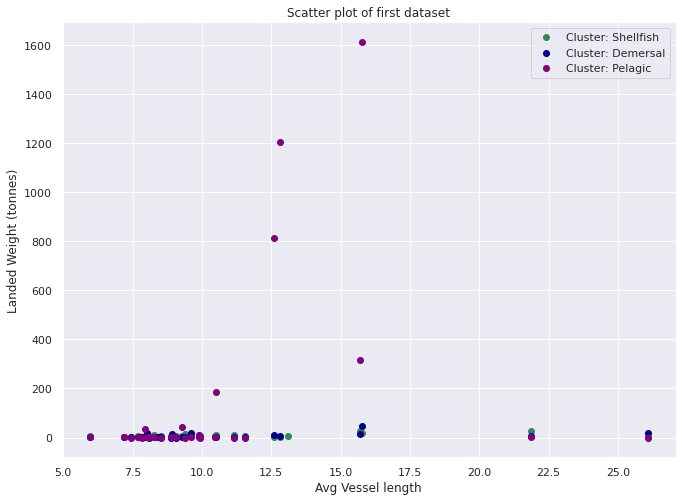

In [130]:
colourMap_dict = {'Demersal':'darkblue',
                  'Pelagic':'purple',
                  'Shellfish':'seagreen'}

# We can then loop through the different clusters and plot a map:
for cluster in set(merged_df['Cluster']):
    
    plt.scatter(merged_df['Avg Vessel length'][merged_df['Cluster']==cluster],
                merged_df['Landed Weight (tonnes)'][merged_df['Cluster']==cluster],
                color=colourMap_dict[cluster], label='Cluster: ' + cluster
               )
plt.legend()

plt.xlabel('Avg Vessel length')
plt.ylabel('Landed Weight (tonnes)')

plt.title('Scatter plot of first dataset')

Try cluster analysis 

Import required modules

In [131]:
from sklearn.metrics import silhouette_samples

In [132]:
from sklearn import cluster

In [133]:
from sklearn.cluster import KMeans

set a separated  clustered dataframe

In [134]:
clusteredData_df = merged_df[['Avg Vessel length','Landed Weight (tonnes)']]
clusteredData_df.head()

,Avg Vessel length,Landed Weight (tonnes)
0,7.684927,0.253824
1,7.684927,4.420427
2,7.684927,0.804176
3,13.106250,5.831873
4,12.831639,1.503200


In [135]:
# create a function that plots the kmeans data
def plot_kmeans(df, n):

    # First, create an instance of the clusterer with k=5
    kmeans= cluster.KMeans(n_clusters=n)

    # Then call the fit function on the clusterer to fit the data to the 3 means.
    assignedClusters_clust = kmeans.fit(df)
    
    # See how the data points have been assigned to clusters:
    display("cluster labels:")
    display(assignedClusters_clust.labels_)

    x = 0
    for i in range(x,n):
        plt.scatter(df['Avg Vessel length'][assignedClusters_clust.labels_==(x)],
                    df['Landed Weight (tonnes)'][assignedClusters_clust.labels_==(x)],
                    marker='o', label=('cluster '+str(x)))
        x += 1

    # Plot each of the centroids:
    for (cx, cy) in assignedClusters_clust.cluster_centers_:
        plt.plot(cx, cy, color='black', marker='x', mew=2)

    plt.title((str(n))+ '-means Clustering with centroids')
    plt.legend()
    plt.xlabel('Avg Vessel length')
    plt.ylabel('Landed Weight (tonnes)')


try kmeans 2

'cluster labels:'

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

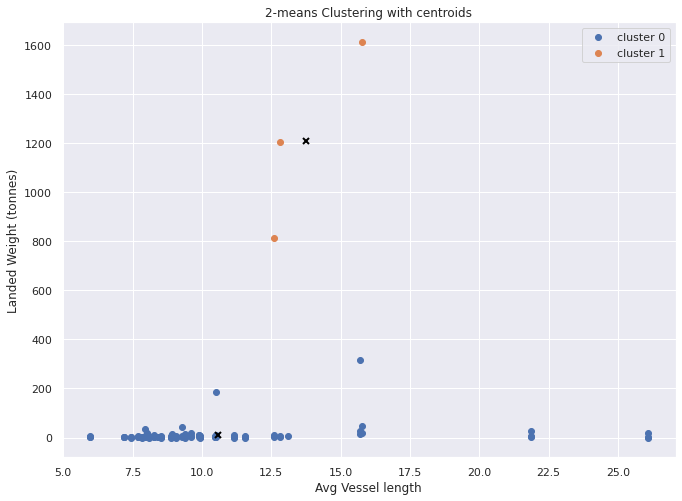

In [136]:
plot_kmeans(clusteredData_df, 2)

try kmeans 3

'cluster labels:'

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

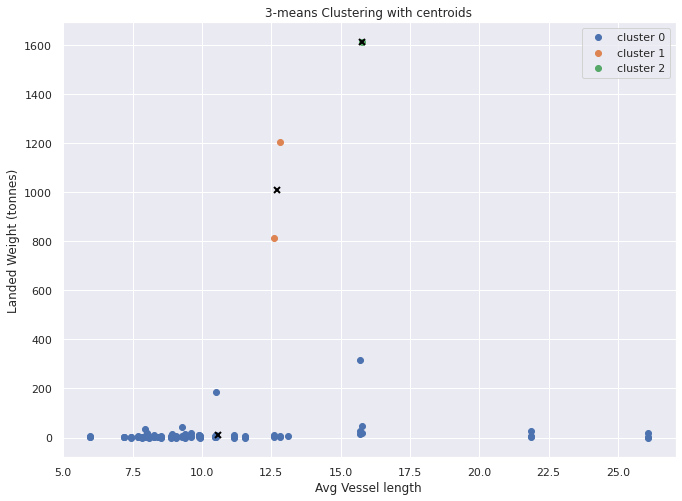

In [137]:
plot_kmeans(clusteredData_df, 3)

try kmeans 4

'cluster labels:'

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

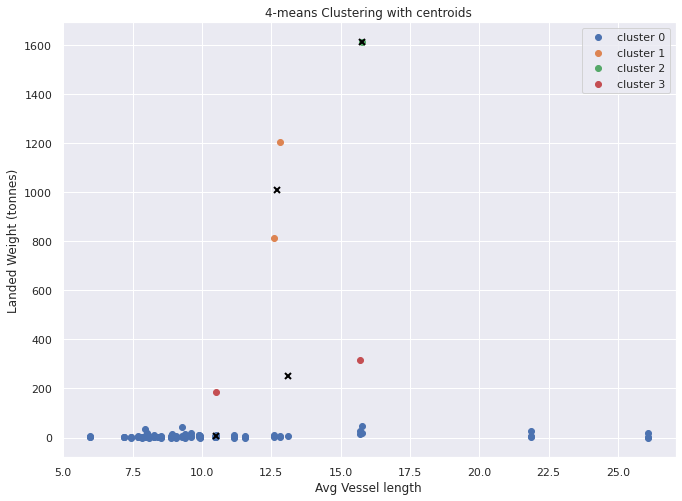

In [138]:
plot_kmeans(clusteredData_df, 4)

try kmeans 5

'cluster labels:'

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

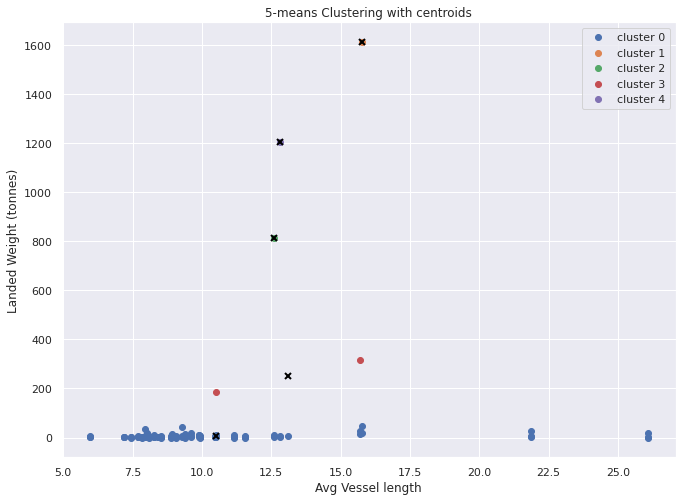

In [139]:
plot_kmeans(clusteredData_df, 5)

In [140]:
# Select only the features that we actually want to cluster on:
landing_vessels_df = merged_df[['Avg Vessel length', 'Landed Weight (tonnes)']]
landing_vessels_df.head()

,Avg Vessel length,Landed Weight (tonnes)
0,7.684927,0.253824
1,7.684927,4.420427
2,7.684927,0.804176
3,13.106250,5.831873
4,12.831639,1.503200


In [141]:
# Run k-means algorithm on the data
def silhouette_kmeans_plot(df, n):
    # Then, create an instance of the clusterer
    kmeans = KMeans(n_clusters=n)
    assignedClusters = kmeans.fit(df)
    

    silhouetteData_df = pd.DataFrame({'silhouette':silhouette_samples(df, assignedClusters.labels_),
                                  'cluster':assignedClusters.labels_})
    display(silhouetteData_df.head())

    silhouetteData_df.sort_values(['cluster', 'silhouette'], inplace=True)
    silhouetteData_df.index = range(len(silhouetteData_df))

    for cluster in set(silhouetteData_df['cluster']):
        plt.bar(silhouetteData_df[silhouetteData_df['cluster']==cluster].index,
        silhouetteData_df[silhouetteData_df['cluster']==cluster]['silhouette'],
        label='Cluster {}'.format(cluster),
        width=1)

    plt.title('Silhouette plot, clustered with $k$-means, $k$='+(str(n)))
    plt.xlabel('Number of data point')
    plt.ylabel('Silhouette coefficient')

    plt.legend()
    plt.ylim((-0.3, 1.1))

try kmeans 2

,silhouette,cluster
0,0.988986,0
1,0.989316,0
2,0.989184,0
3,0.988536,0
4,0.988596,0


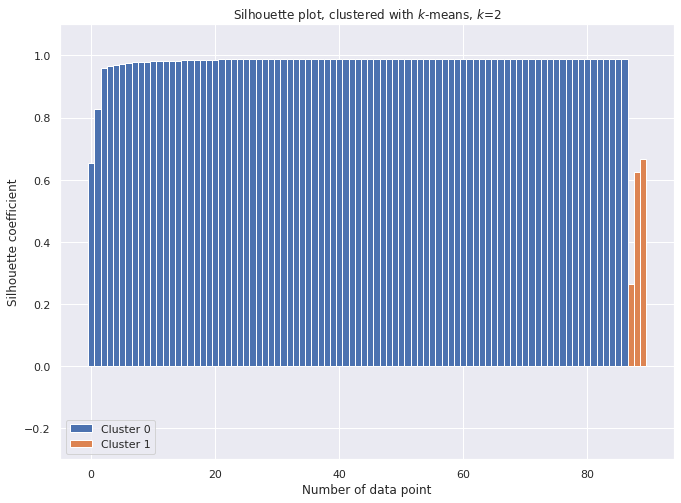

In [142]:
silhouette_kmeans_plot(landing_vessels_df, 2)

try kmeans 4

,silhouette,cluster
0,0.983650,0
1,0.984114,0
2,0.983942,0
3,0.982945,0
4,0.983064,0


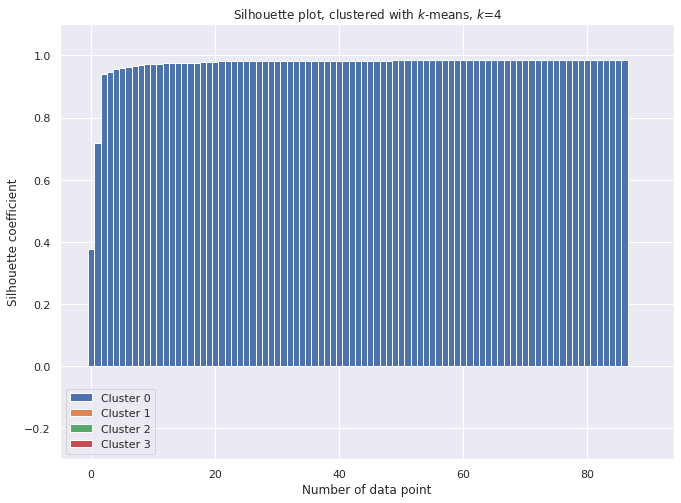

In [143]:
silhouette_kmeans_plot(landing_vessels_df, 4)

try kmeans 6

,silhouette,cluster
0,0.958140,2
1,0.959149,2
2,0.959320,2
3,0.953313,2
4,0.955113,2


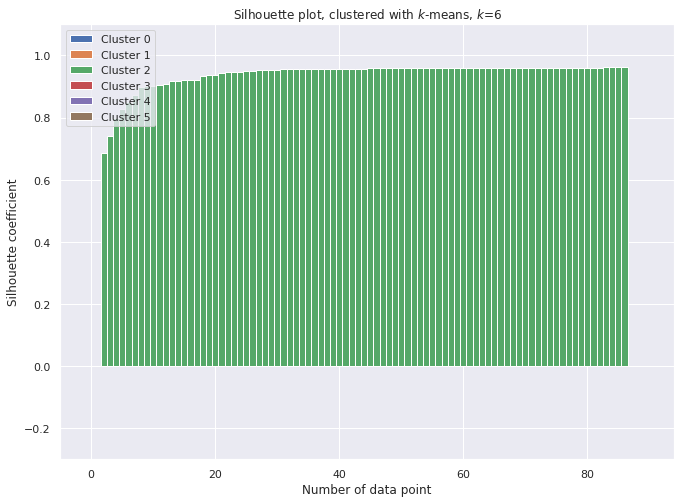

In [144]:
silhouette_kmeans_plot(landing_vessels_df, 6)

try kmeans 7

,silhouette,cluster
0,0.822951,0
1,0.781736,0
2,0.826908,0
3,0.684411,0
4,0.772319,0


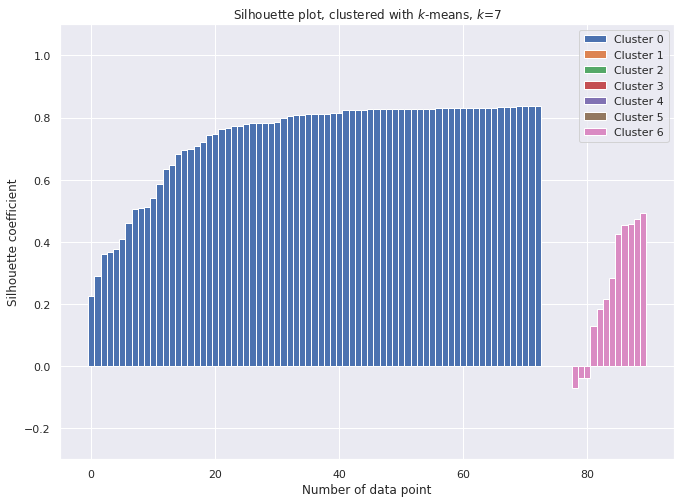

In [145]:
silhouette_kmeans_plot(landing_vessels_df, 7)

try kmeans 8

,silhouette,cluster
0,0.747702,0
1,0.575263,0
2,0.748892,0
3,0.266110,0
4,0.610479,0


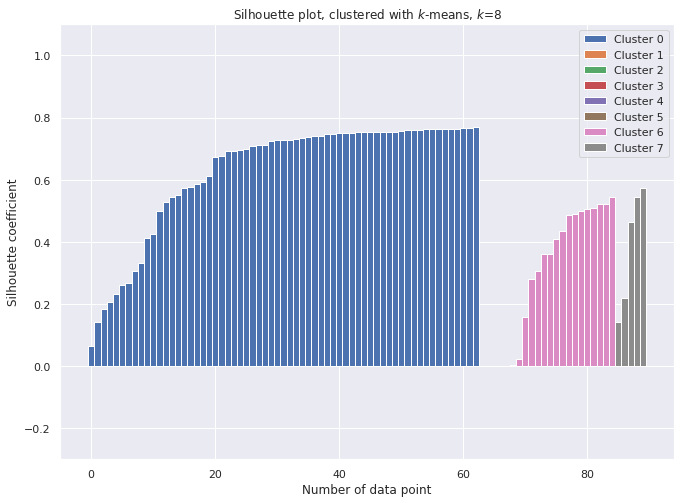

In [146]:
silhouette_kmeans_plot(landing_vessels_df, 8)

try kmeans 10

,silhouette,cluster
0,0.776282,0
1,0.520215,0
2,0.777148,0
3,0.167404,0
4,0.604396,0


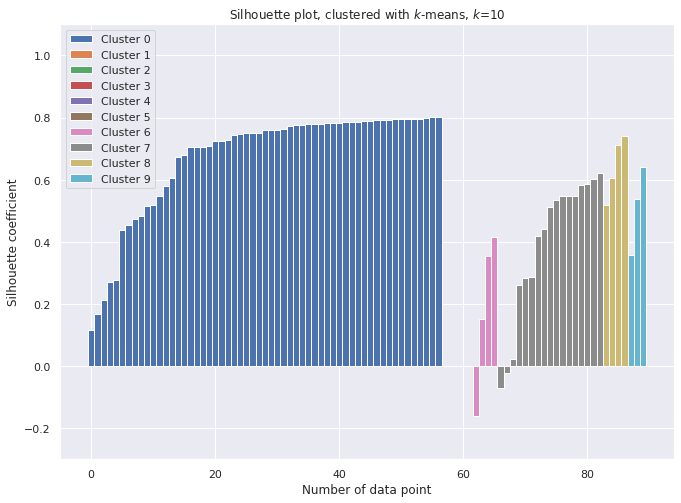

In [147]:
silhouette_kmeans_plot(landing_vessels_df, 10)

In [148]:
merged_df.head()

,Administrative port,Avg Vessel length,Latitude,Longitude,Landed Weight (tonnes),Cluster
0,ABERDEEN,7.684927,57.148243,-2.092809,0.253824,Demersal
1,ABERDEEN,7.684927,57.148243,-2.092809,4.420427,Shellfish
2,ABERDEEN,7.684927,57.148243,-2.092809,0.804176,Pelagic
3,AYR,13.106250,55.462804,-4.630250,5.831873,Shellfish
4,BELFAST,12.831639,54.596391,-5.930183,1.503200,Shellfish


plot data with 2 decimal places

In [149]:
plot_df = merged_df.pivot(index=['Administrative port','Avg Vessel length', 'Latitude','Longitude'], columns='Cluster', values='Landed Weight (tonnes)').reset_index().fillna(0)
plot_df['Avg Vessel length'] = plot_df['Avg Vessel length'].round(2)
plot_df['Demersal'] = plot_df['Demersal'].round(2)
plot_df['Pelagic'] = plot_df['Pelagic'].round(2)
plot_df['Shellfish'] = plot_df['Shellfish'].round(2)
plot_df.head()

Cluster,Administrative port,Avg Vessel length,Latitude,Longitude,Demersal,Pelagic,Shellfish
0,ABERDEEN,7.68,57.148243,-2.092809,0.25,0.80,4.42
1,AYR,13.11,55.462804,-4.630250,0.00,0.00,5.83
2,BELFAST,12.83,54.596391,-5.930183,5.63,1202.01,1.50
3,BRIXHAM,9.88,50.395240,-3.514544,1.65,9.71,10.17
4,BUCKIE,10.46,57.676282,-2.964897,1.07,1.54,8.14


### Visualise on a Map

In [150]:
# create a UK base map
vessel_landings_map = folium.Map(location=[plot_df['Latitude'].mean(),plot_df['Longitude'].mean()], 
                          zoom_start=7, min_zoom=5, max_zoom=14)

# create a map plotter function
def add_vessel_landings_marker(df, fmap):
    """Take a dataframe's details and mark to a map """
    
    # initialise a popup message about location  
    popup = folium.Popup("""
                         <center><b>Report Period: 2016-20</b>
                         <p>Vessel length measured in metres and landings weight in tonnes</p></center>
                         <li>Admin port	: {}</li>
                         <li>Avg. Vessel length: {}</li>
                         <li>Avg. Demersal: {}</li>
                         <li>Avg. Pelagic: {}</li>
                         <li>Avg. Shellfish: {}</li>
                         """
                         .format(df['Administrative port'],df['Avg Vessel length'],df['Demersal'],df['Pelagic'],df['Shellfish']), 
                         max_width=200)

    # get dataframe location and mark plot onto map
    folium.Circle(location=[df['Latitude'],df['Longitude']], 
                  popup = popup, 
                  radius = df['Avg Vessel length'] * 500, 
                  color ='purple',
                  fill_color='mediumpurple',
                  opacity = 0.4
                 ).add_to(fmap)

# apply the function to plot_df
plot_df.apply(add_vessel_landings_marker, fmap=vessel_landings_map, axis=1)

# preview the map
vessel_landings_map